# Clifford Volume and Free-fermion Benchmark 
## Qiksit demonstration


The following packages are required to run this tutorial:
- `qiskit`
- `qiskit-aer` 
- `qiskit-aqt-provider`

Make sure these packages are installed in your Python environment.

If needed, you can install them via:
```bash
pip install qiskit qiskit-aer qiskit-aqt-provider



In [1]:
from ScalableVolumetricBenchmark import CliffordVolumeBenchmark, FreeFermionVolumeBenchmark

from qiskit import QuantumCircuit as QiskitCircuit
from qiskit.transpiler import CouplingMap
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, pauli_error

In [3]:
import pytket

## Create benchmark

In [2]:
#generate benchmark 

n_qubits = 5
sample_size = 4
shots = 2000

Clifford_benchmark = CliffordVolumeBenchmark(
    number_of_qubits=n_qubits,
    sample_size=sample_size,
    format="qasm2",
    target_sdk="qiskit",
    shots=shots,
    auto_save=False,
)
_ = Clifford_benchmark.create_benchmark()


FreeFermion_benchmark = FreeFermionVolumeBenchmark(
    number_of_qubits=n_qubits,
    sample_size=sample_size,
    format="qasm2",
    target_sdk="qiskit",
    shots=shots,
    auto_save=False,
)

_ = FreeFermion_benchmark.create_benchmark()


## Simulate circuits

In [3]:
simulator = AerSimulator() 

#simulate the circuits for eqach sample separatly
Clifford_counts_data = {}
for sample in Clifford_benchmark.samples:
    for circuit in sample["circuits"]:
        cid = circuit["circuit_id"]
        qasm = circuit["qasm"]
        qk_circ = QiskitCircuit.from_qasm_str(qasm)
        job = simulator.run(qk_circ, shots=Clifford_benchmark.shots)
        result = job.result()
        counts = result.get_counts()
        remapped = {b[::-1]: int(c) for b, c in counts.items()} # adjust the bit ordering
        Clifford_counts_data[cid] = remapped 

FreeFermion_counts_data = {}
for sample in FreeFermion_benchmark.samples:
    for circuit in sample["circuits"]:
        cid = circuit["circuit_id"]
        qasm = circuit["qasm"]
        qk_circ = QiskitCircuit.from_qasm_str(qasm)
        job = simulator.run(qk_circ, shots=FreeFermion_benchmark.shots)
        result = job.result()
        counts = result.get_counts()
        remapped = {b[::-1]: int(c) for b, c in counts.items()} # adjust the bit ordering
        FreeFermion_counts_data[cid] = remapped 
    
FreeFermion_counts_data # the simulated results are stored as a dict, using the circuit_id as a keys

{'0_maj_0': {'10100': 185,
  '10111': 151,
  '01110': 147,
  '00001': 63,
  '01100': 18,
  '01011': 331,
  '10011': 195,
  '10101': 82,
  '01101': 160,
  '00101': 13,
  '11100': 20,
  '01111': 58,
  '11011': 58,
  '11110': 50,
  '00100': 40,
  '10000': 10,
  '10010': 78,
  '10001': 125,
  '10110': 59,
  '11111': 58,
  '00111': 29,
  '11101': 10,
  '01001': 8,
  '11001': 27,
  '11000': 11,
  '00010': 3,
  '00110': 3,
  '01000': 4,
  '00011': 2,
  '01010': 1,
  '11010': 1},
 '0_maj_1': {'01110': 14,
  '10111': 99,
  '00101': 64,
  '10100': 239,
  '00001': 217,
  '10001': 14,
  '10011': 310,
  '11011': 61,
  '10101': 158,
  '00110': 97,
  '01011': 138,
  '01001': 52,
  '11110': 5,
  '11100': 56,
  '10010': 69,
  '11001': 18,
  '01111': 92,
  '00011': 28,
  '01100': 79,
  '00111': 61,
  '01101': 46,
  '11101': 43,
  '11000': 7,
  '10110': 6,
  '11010': 12,
  '00100': 6,
  '01010': 7,
  '00010': 2},
 '0_maj_2': {'10010': 39,
  '10000': 143,
  '10011': 348,
  '00000': 10,
  '01011': 229,
  '

### Attach simulated results to the benchmark object

In [4]:
Clifford_benchmark.add_experimental_results(
    Clifford_counts_data,
    experiment_id="qiskit_aer_clifford_demo",
    platform="qiskit-aer",
    experiment_metadata={"backend": "AerSimulator"},
)


FreeFermion_benchmark.add_experimental_results(
    FreeFermion_counts_data,
    experiment_id="qiskit_aer_freefermion_demo",
    platform="qiskit-aer",
    experiment_metadata={"backend": "AerSimulator"},
)


### Evaluate and plot benchmark


 Clifford Benchmark Evaluation (5 qubits)
Thresholds: τ_S = 1/e = 0.367879   τ_D = 1/(2e) = 0.183940
Shots per circuit: 2000
--------------------------------------------------------------
Stabilizers (all measured):
  • mean ± std: 1.000000 ± 0.000000
  • min EV:     1.000000
Destabilizers (all measured):
  • mean ± std: -0.004375 ± 0.021670
  • max |EV|:   0.054000
--------------------------------------------------------------
Per-sample pass count: 4/4
Worst stabilizer margin (min over samples of <S>-2σ): sample 0 -> 1.000000
Worst destabilizer margin (max over samples of |<D>|+2σ): sample 2 -> 0.098656
Benchmark passed (all samples): True



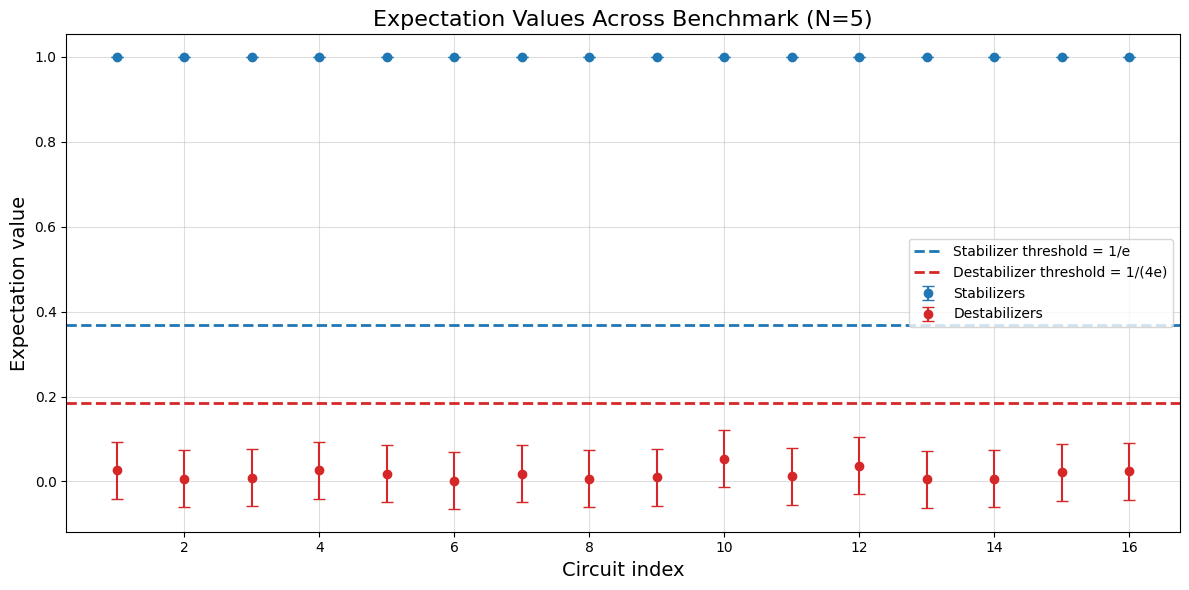

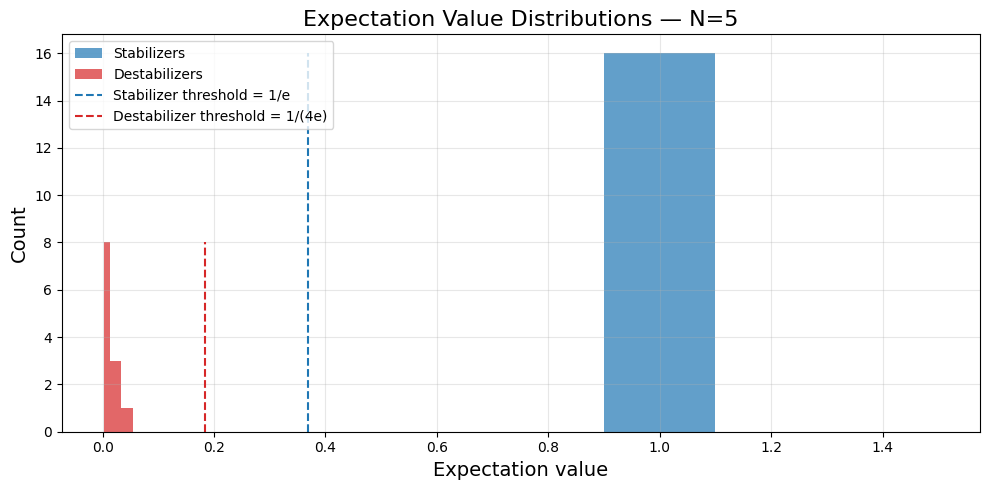

In [5]:
#Clifford Volume
evaluation = Clifford_benchmark.evaluate_benchmark()
Clifford_benchmark.plot_all_expectation_values()
Clifford_benchmark.plot_expectation_histograms(bins=5)


 Free-Fermion Benchmark Evaluation (5 qubits)

Parallel projected values (should be near 1):
  • average: 1.005794 ± 0.016655
  • lowest measured value: 0.981667

Orthogonal projected values (should be near 0):
  • average: -0.019896 ± 0.032566
  • highest absolute value: 0.073873


Benchmark passed: True



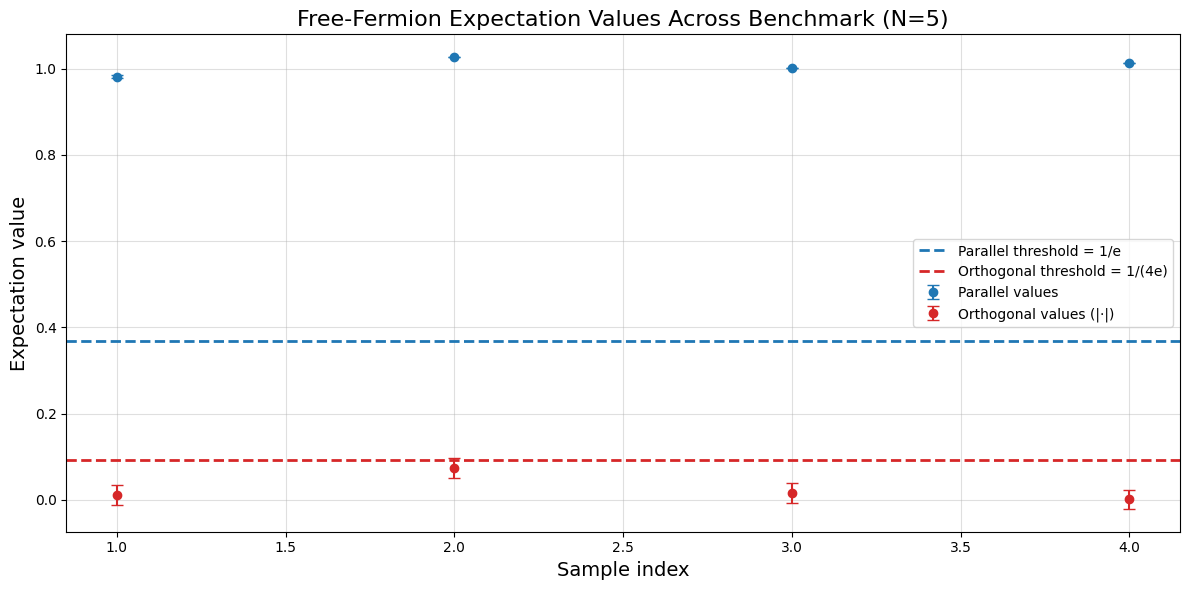

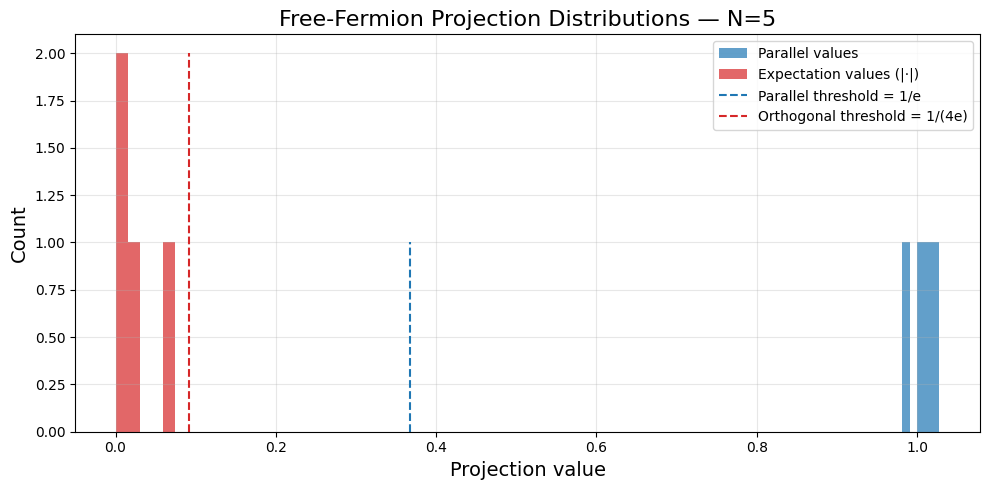

In [6]:
#Free-fermion Volume
evaluation = FreeFermion_benchmark.evaluate_benchmark()
FreeFermion_benchmark.plot_all_expectation_values()
FreeFermion_benchmark.plot_expectation_histograms(bins=5)

### Noisy simulator

Let us creat a custom noisy simulator.

In [7]:
number_of_qubits = 10

cm = CouplingMap.from_line(num_qubits=number_of_qubits)
noise_model = NoiseModel()
cx_depolarizing_prob = 0.01 # two qubit depolarization error
p_r = 0.01 # for uncorrelated bit-flip readout error

noise_model.add_all_qubit_quantum_error(depolarizing_error(cx_depolarizing_prob, 2), ["cx"]) # cnot depolarization error
noise_model.add_all_qubit_quantum_error(pauli_error([('X',p_r), ('I', 1 - p_r)]), "measure") # simple readout bitflip error

basis_gates=['cx', 'rx', 'ry', 'ry', 'p']

ideal_backend = AerSimulator(basis_gates=basis_gates)
ideal_pass_manager = generate_preset_pass_manager(optimization_level=3, basis_gates=['cx', 'rx', 'ry', 'ry', 'p'])

noisy_backend = AerSimulator(noise_model=noise_model, basis_gates=basis_gates)
noisy_pass_manager = generate_preset_pass_manager(optimization_level=3, basis_gates=['cx', 'rx', 'ry', 'ry', 'p'])

In [8]:
# the workflow is the same as before
# creat benchmark -> generate circuits -> transpile circuits -> execute circuts -> evaluate circuits
#generate benchmark 

n_qubits = 5
sample_size = 4
shots = 2000

Clifford_benchmark = CliffordVolumeBenchmark(
    number_of_qubits=n_qubits,
    sample_size=sample_size,
    format="qasm2",
    target_sdk="qiskit",
    shots=shots,
    auto_save=False,
)
_ = Clifford_benchmark.create_benchmark()


FreeFermion_benchmark = FreeFermionVolumeBenchmark(
    number_of_qubits=n_qubits,
    sample_size=sample_size,
    format="qasm2",
    target_sdk="qiskit",
    shots=shots,
    auto_save=False,
)

_ = FreeFermion_benchmark.create_benchmark()


In [9]:
simulator = AerSimulator() 

#simulate the circuits for eqach sample separatly
Clifford_counts_data = {}
for sample in Clifford_benchmark.samples:
    for circuit in sample["circuits"]:
        cid = circuit["circuit_id"]
        qasm = circuit["qasm"]
        qk_circ = QiskitCircuit.from_qasm_str(qasm)
        job = noisy_backend.run(noisy_pass_manager.run(qk_circ), shots=Clifford_benchmark.shots)
        result = job.result()
        counts = result.get_counts()
        remapped = {b[::-1]: int(c) for b, c in counts.items()} # adjust the bit ordering
        Clifford_counts_data[cid] = remapped 

FreeFermion_counts_data = {}
for sample in FreeFermion_benchmark.samples:
    for circuit in sample["circuits"]:
        cid = circuit["circuit_id"]
        qasm = circuit["qasm"]
        qk_circ = QiskitCircuit.from_qasm_str(qasm)
        job = noisy_backend.run(noisy_pass_manager.run(qk_circ), shots=FreeFermion_benchmark.shots)
        result = job.result()
        counts = result.get_counts()
        remapped = {b[::-1]: int(c) for b, c in counts.items()} # adjust the bit ordering
        FreeFermion_counts_data[cid] = remapped 
    
FreeFermion_counts_data # the simulated results are stored as a dict, using the circuit_id as a keys

{'0_maj_0': {'10111': 65,
  '10100': 326,
  '10011': 62,
  '01001': 74,
  '11100': 62,
  '01000': 89,
  '00111': 23,
  '10101': 102,
  '11101': 64,
  '00100': 85,
  '10000': 30,
  '10001': 257,
  '11110': 60,
  '00001': 38,
  '01100': 28,
  '00101': 40,
  '10010': 123,
  '10110': 39,
  '01101': 50,
  '01010': 20,
  '11111': 48,
  '01011': 52,
  '00011': 13,
  '11011': 18,
  '01110': 76,
  '00110': 23,
  '11000': 35,
  '00000': 23,
  '01111': 22,
  '00010': 10,
  '11010': 16,
  '11001': 27},
 '0_maj_1': {'00011': 61,
  '01001': 15,
  '11011': 70,
  '11000': 119,
  '00110': 38,
  '01101': 108,
  '10011': 40,
  '11010': 121,
  '10110': 80,
  '11100': 102,
  '01110': 45,
  '10101': 197,
  '11101': 78,
  '11001': 147,
  '11111': 43,
  '10100': 100,
  '00010': 24,
  '10000': 110,
  '00101': 31,
  '10001': 38,
  '01100': 74,
  '00000': 76,
  '01000': 27,
  '00100': 23,
  '01010': 26,
  '01011': 20,
  '00111': 15,
  '10111': 65,
  '01111': 24,
  '10010': 36,
  '11110': 27,
  '00001': 20},
 '0_

In [10]:
Clifford_benchmark.add_experimental_results(
    Clifford_counts_data,
    experiment_id="qiskit_aer_clifford_demo",
    platform="qiskit-aer",
    experiment_metadata={"backend": "AerSimulator"},
)


FreeFermion_benchmark.add_experimental_results(
    FreeFermion_counts_data,
    experiment_id="qiskit_aer_freefermion_demo",
    platform="qiskit-aer",
    experiment_metadata={"backend": "AerSimulator"},
)



 Clifford Benchmark Evaluation (5 qubits)
Thresholds: τ_S = 1/e = 0.367879   τ_D = 1/(2e) = 0.183940
Shots per circuit: 2000
--------------------------------------------------------------
Stabilizers (all measured):
  • mean ± std: 0.800812 ± 0.040553
  • min EV:     0.730000
Destabilizers (all measured):
  • mean ± std: 0.005937 ± 0.022275
  • max |EV|:   0.046000
--------------------------------------------------------------
Per-sample pass count: 4/4
Worst stabilizer margin (min over samples of <S>-2σ): sample 0 -> 0.699435
Worst destabilizer margin (max over samples of |<D>|+2σ): sample 0 -> 0.090674
Benchmark passed (all samples): True



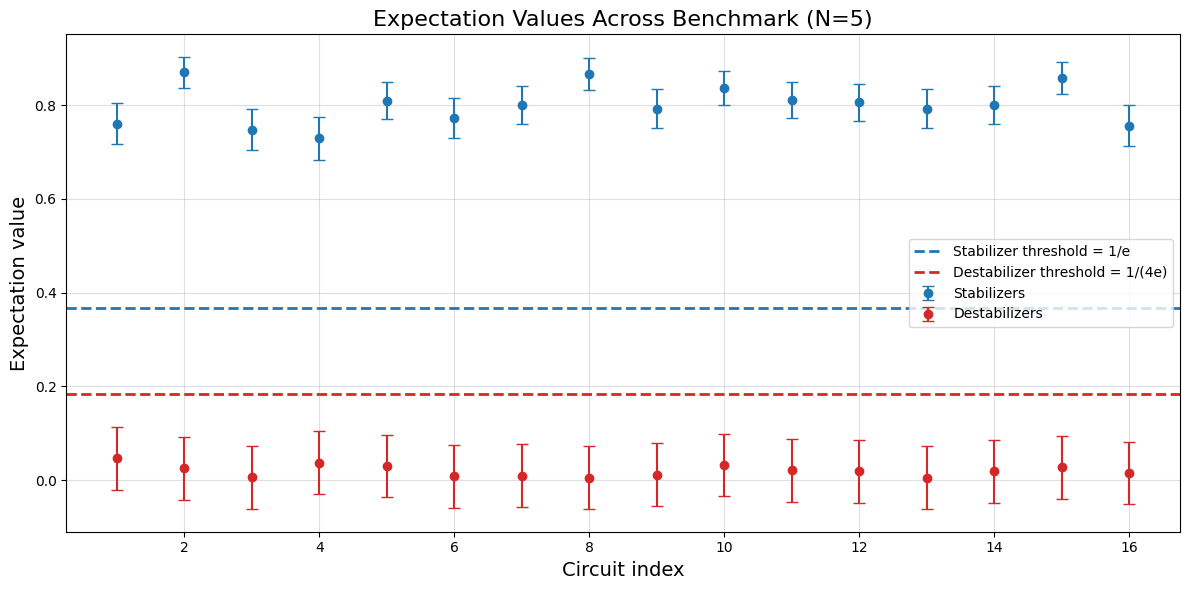

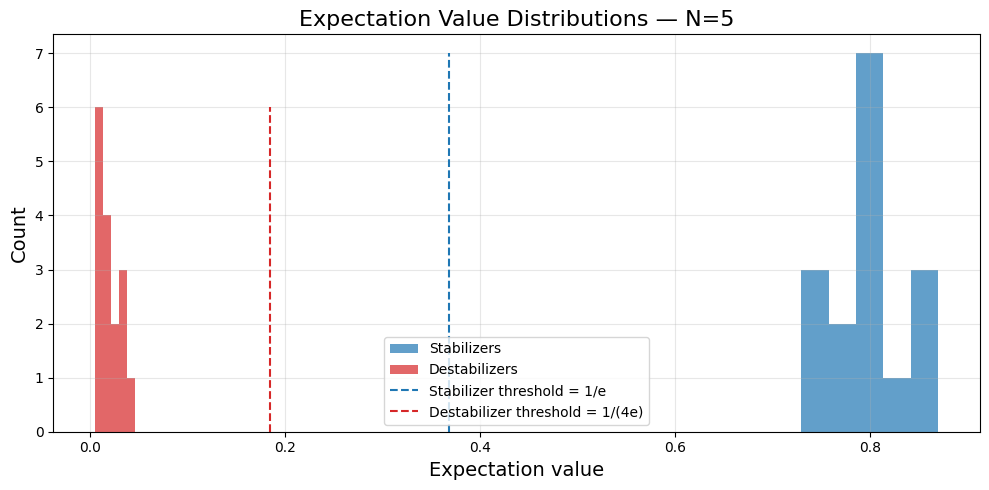

In [11]:
#Clifford Volume
evaluation = Clifford_benchmark.evaluate_benchmark()
Clifford_benchmark.plot_all_expectation_values()
Clifford_benchmark.plot_expectation_histograms(bins=5)


 Free-Fermion Benchmark Evaluation (5 qubits)

Parallel projected values (should be near 1):
  • average: 0.713200 ± 0.032909
  • lowest measured value: 0.681332

Orthogonal projected values (should be near 0):
  • average: -0.033987 ± 0.038293
  • highest absolute value: 0.074980


Benchmark passed: True



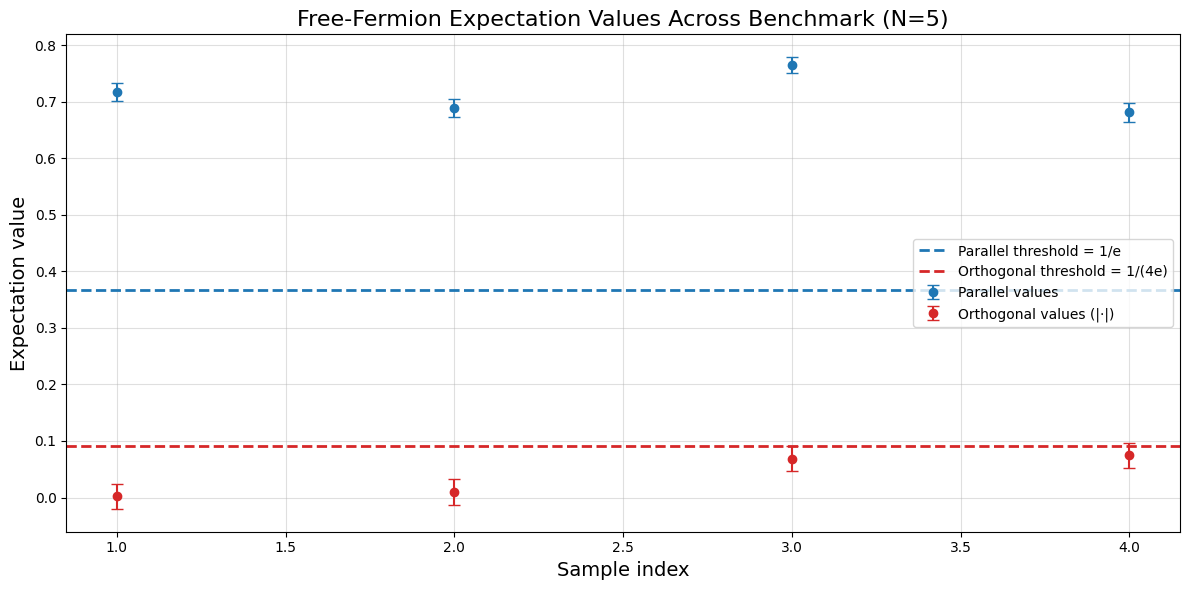

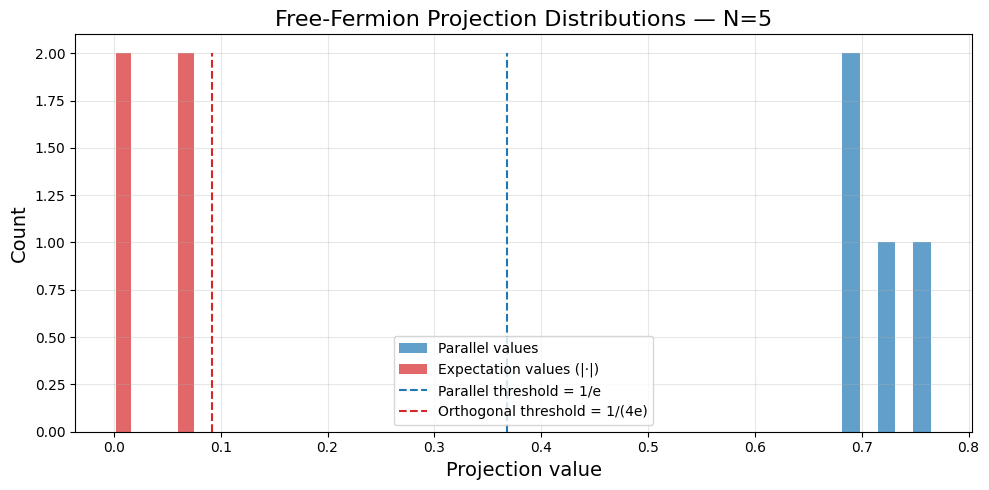

In [12]:
#Free-fermion Volume
evaluation = FreeFermion_benchmark.evaluate_benchmark()
FreeFermion_benchmark.plot_all_expectation_values()
FreeFermion_benchmark.plot_expectation_histograms(bins=5)

# Execute benchmark on real hardware supporting Qiskit
## Example workflow using the AQT quantum hardware provider


In [13]:
from qiskit_aqt_provider import AQTProvider
from qiskit_aqt_provider.primitives import AQTSampler

In [14]:
# Accses the providers devices
# Any token (even invalid) gives access to the offline simulation backends.
# With valid token can access real devices
provider = AQTProvider("ACCESS_TOKEN")

In [15]:
# Select an execution backend.

provider.backends() #list all avaible providers

Workspace ID,Resource ID,Description,Resource type,Available qubits
default,offline_simulator_no_noise,Offline ideal simulator,offline_simulator,20
,offline_simulator_noise,Offline noisy simulator,offline_simulator,20


In [16]:
backend = provider.get_backend("offline_simulator_no_noise") # select a backend

 # create the pass manager for the backend, to transpile the circuits
pass_manager = generate_preset_pass_manager(optimization_level=3, backend=backend)

In [17]:
#generate benchmark 


n_qubits = 5
sample_size = 4
shots = 2000

Clifford_benchmark = CliffordVolumeBenchmark(
    number_of_qubits=n_qubits,
    sample_size=sample_size,
    format="qasm2",
    target_sdk="qiskit",
    shots=shots,
    auto_save=False,
)
_ = Clifford_benchmark.create_benchmark()


FreeFermion_benchmark = FreeFermionVolumeBenchmark(
    number_of_qubits=n_qubits,
    sample_size=sample_size,
    format="qasm2",
    target_sdk="qiskit",
    shots=shots,
    auto_save=False,
)

_ = FreeFermion_benchmark.create_benchmark()

In [18]:
# get all circuts 
Clifford_qasm = Clifford_benchmark.get_all_circuits()
Freefermion_qasm = FreeFermion_benchmark.get_all_circuits()

# transpile all circuits
Clifford_circuits = [pass_manager.run(QiskitCircuit.from_qasm_str(qc)) for qc in Clifford_qasm]
Freefermion_circuits = [pass_manager.run(QiskitCircuit.from_qasm_str(qc)) for qc in Freefermion_qasm]

In [19]:
# run all cicrcuits and get the result for the Clifford Volume Benchmark
job = backend.run(Clifford_circuits, shots = Clifford_benchmark.shots)
job_id = job.job_id()
print("job ID:", job.job_id())

print(job.status())

results = job.result()


job ID: 01b73ca9-e666-4849-8e36-a7e1ec3c2558
JobStatus.DONE


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:03<00:00,  9.89it/s]


In [20]:
#calculate counts
counts = results.get_counts()

for i in range(len(counts)):
    count = counts[i]
    keys = list(count.keys())
    new_count={}
    
    for k in keys:
        new_count[k[::-1]] = count[k]
    
    counts[i] = new_count

In [21]:
Clifford_benchmark.add_experimental_results(
    counts,
    experiment_id=job_id,
    platform="AQT Ibex (simulator)",
    experiment_metadata={"backend": "AQTs Qiskit based simulator"},
)


 Clifford Benchmark Evaluation (5 qubits)
Thresholds: τ_S = 1/e = 0.367879   τ_D = 1/(2e) = 0.183940
Shots per circuit: 2000
--------------------------------------------------------------
Stabilizers (all measured):
  • mean ± std: 1.000000 ± 0.000000
  • min EV:     1.000000
Destabilizers (all measured):
  • mean ± std: -0.001000 ± 0.020815
  • max |EV|:   0.050000
--------------------------------------------------------------
Per-sample pass count: 4/4
Worst stabilizer margin (min over samples of <S>-2σ): sample 0 -> 1.000000
Worst destabilizer margin (max over samples of |<D>|+2σ): sample 2 -> 0.094665
Benchmark passed (all samples): True



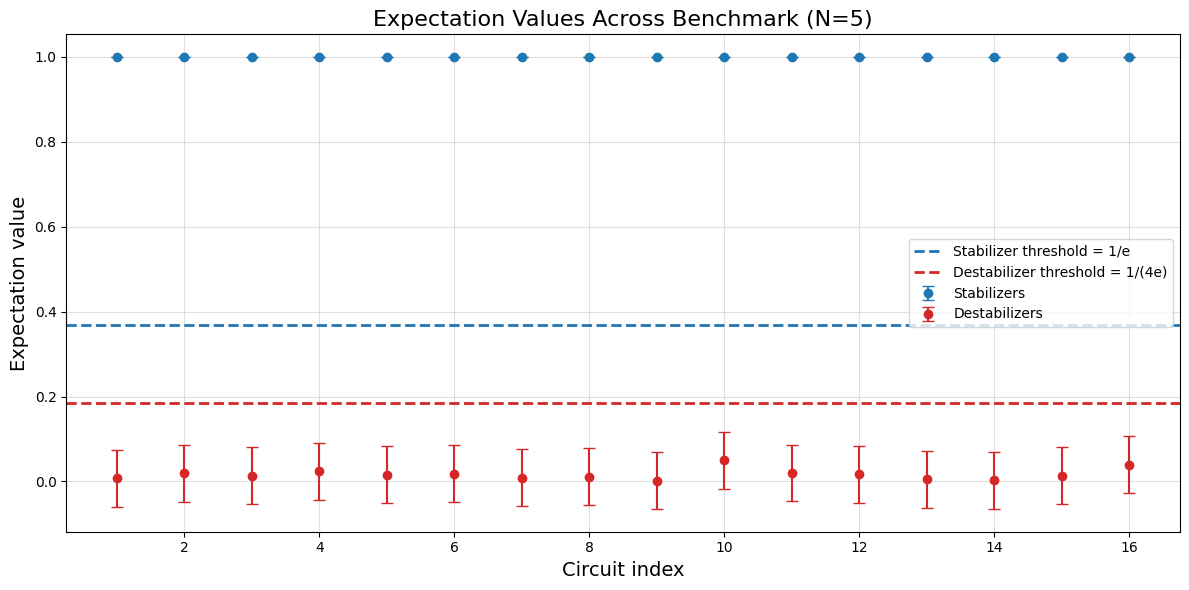

In [22]:
evaluation = Clifford_benchmark.evaluate_benchmark()
Clifford_benchmark.plot_all_expectation_values()

In [23]:
# run all cicrcuits and get the result for the FreeFermion Volume Benchmark
job = backend.run(Freefermion_circuits, shots = FreeFermion_benchmark.shots)
job_id = job.job_id()
print("job ID:", job.job_id())

print(job.status())

results = job.result()


job ID: 9903e19e-fa0a-4ddb-85a7-ac3a907390ed
JobStatus.DONE


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:04<00:00,  9.65it/s]


In [24]:
#calculate counts
counts = results.get_counts()

for i in range(len(counts)):
    count = counts[i]
    keys = list(count.keys())
    new_count={}
    
    for k in keys:
        new_count[k[::-1]] = count[k]
    
    counts[i] = new_count

In [25]:
FreeFermion_benchmark.add_experimental_results(
    counts,
    experiment_id=job_id,
    platform="AQT Ibex (simulator)",
    experiment_metadata={"backend": "AQTs Qiskit based simulator"},
)


 Free-Fermion Benchmark Evaluation (5 qubits)

Parallel projected values (should be near 1):
  • average: 0.990362 ± 0.012904
  • lowest measured value: 0.973359

Orthogonal projected values (should be near 0):
  • average: 0.007319 ± 0.024749
  • highest absolute value: 0.033749


Benchmark passed: True



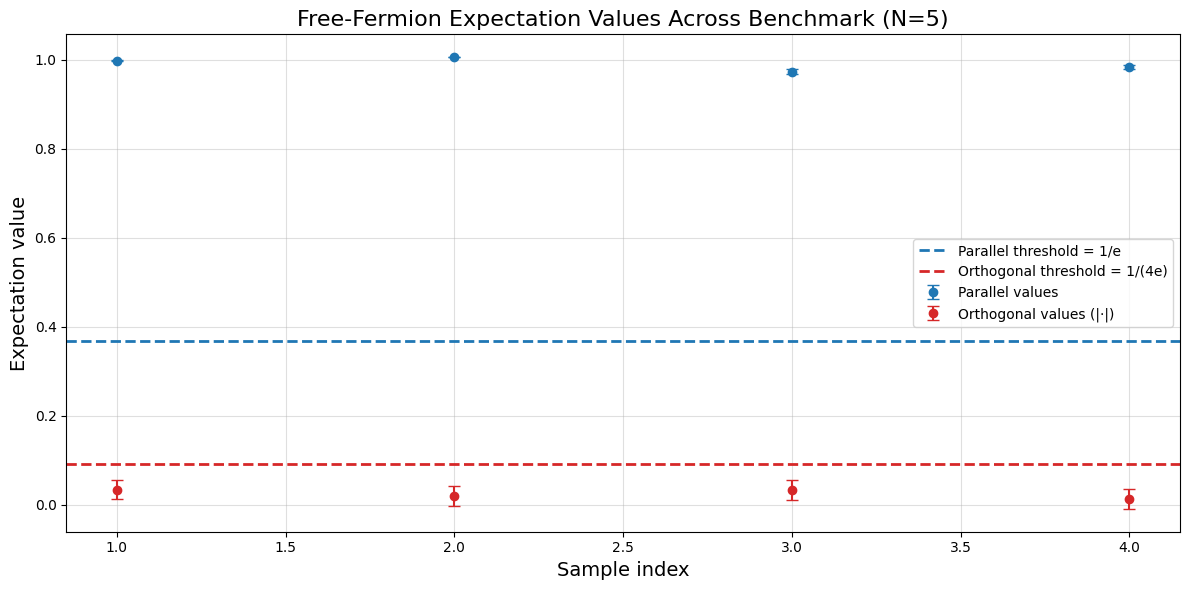

In [26]:
evaluation = FreeFermion_benchmark.evaluate_benchmark()
FreeFermion_benchmark.plot_all_expectation_values()